In [1]:
import h5py
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import os
import glob
from datetime import datetime
from itertools import chain
import imageio
from tqdm import tqdm
from PIL import Image
import scipy
from scipy.signal import argrelextrema, find_peaks, square
from scipy.optimize import curve_fit
from scipy.interpolate import approximate_taylor_polynomial
from matplotlib import font_manager

# for x in os.environ:
#     print((x, os.getenv(x)))
from MinervaManager import MinervaManager
from MinervaPlot import imp_plot, plot_single
from MinervaPlot import normalize_by_channel, remove_outliers, rm_banding
from MinervaPlot import remove_outliers as rmout

from IPython.display import clear_output
import time

%matplotlib inline

def video_save(manager=None,myframes=None,savename=None,fps=10):
    print(' -- Saving plots as .gif animation -- ')
    plotdir = os.path.join(manager.logdir,'plots')
    if(not os.path.exists(plotdir)):
        os.mkdir(plotdir)
    savename=os.path.join(plotdir,savename+'.gif')
    imageio.mimsave(savename, myframes, fps=fps)
    print(' --  Animation saved as {}  -- '.format(savename))
    
def smoothed(array1d=None, kernel_size=16,mode='valid'):
    kernel=np.ones(kernel_size)/kernel_size
    return np.convolve(array1d, kernel, mode=mode)

def peaks(array1d=None, prominence=None):
    indices,_ = find_peaks(array1d, prominence=prominence)
    return indices

# Default Plotting

In [2]:
# impdir = r"C:\Users\jtincan\Desktop\Analysis\F0421_06132023\F0421_minerva/"
impdir =r"C:\Users\jtincan\Desktop\Analysis\F0419_Analysis\impedance/"
# phdir = r"C:/Users/jtincan/Desktop/F0362_Analysis/pH/"
# ectdir1 = r"C:/Users/jtincan/Desktop/F0362_Analysis/ECT_pre/"
# ectdir2 = r"C:/Users/jtincan/Desktop/F0362_Analysis/ECT_mid/"

iM = MinervaManager(dtype='imp',logdir=impdir);
# pM = MinervaManager(dtype='ph',logdir=phdir)
# eM1 = MinervaManager(dtype='ect',logdir=ectdir1)
# eM2 = MinervaManager(dtype='ect',logdir=ectdir2)

Logfile Directory:  C:\Users\jtincan\Desktop\Analysis\F0419_Analysis\impedance/
 -- (2) Logfiles of *impedance* datatype -- 

Filename:  F0419_imp_p1.h5
# images:  94
Filename:  F0419_imp_p2.h5
# images:  288


In [3]:
normrows = [0,450]
vrange = [-4,1]
imrange=None
subfirst=False
# imp_plot(manager=iM,imrange=imrange,vrange=vrange,normrows=normrows,verbose=False,deltas=subfirst,pltall=True);

# Manual Plotting

In [4]:
images_ph1,images_ph2,imagetimes,imagenames=iM.get_data_stack()

 --  Importing impedance data from F0419_imp_p1.h5  -- : 100%|████████████████████████| 94/94 [00:00<00:00, 647.49it/s]
 --  Importing impedance data from F0419_imp_p2.h5  -- : 100%|██████████████████████| 288/288 [00:00<00:00, 662.03it/s]

Completed import of 382 impedance images from (2) logfiles
Total import size:  13216 Bytes


In [7]:
normrows = [0,450]
for i in range(len(images_ph1)):
    images_ph1[i] = rm_banding(images_ph1[i],normrows=normrows)
#     images_ph2[i] = rm_banding(images_ph2[i],normrows=normrows)
#     images_ph1[i] = remove_outliers(images_ph1[i])
#     images_ph2[i] = remove_outliers(images_ph2[i])
    
# final_images = (np.array(images_ph1)+np.array(images_ph2))/2
final_images=np.array(images_ph1)
final_images.shape

(382, 512, 256)

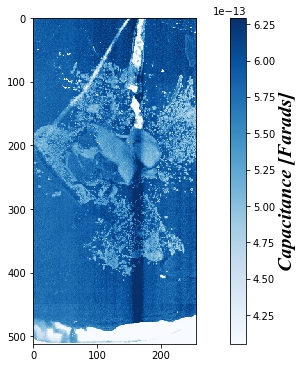

In [10]:
i=150
fig = plt.figure(figsize=(12,6))
grid = plt.GridSpec(3, 3, hspace=0.2, wspace=0.2)
ax_main = fig.add_subplot(grid[:, :])
im1 = ax_main.imshow(final_images[i], #-np.median(image_1)), # [50:100,:40]),
                    vmin=np.mean(final_images[i][normrows,:])+vrange[0]*np.std(final_images[i][normrows,:]), 
                    vmax=np.mean(final_images[i][normrows,:])+vrange[1]*np.std(final_images[i][normrows,:]), 
                    cmap='Blues')
cb=fig.colorbar(im1,ax=ax_main,label='Capacitance [Farads]')
axcb = cb.ax
text = axcb.yaxis.label
font = font_manager.FontProperties(family='times new roman', style='italic', size=20)
text.set_font_properties(font)
# ax_main.set_title( '   ' + str(i) + '   ' + iM.list_all[i] + ' time elapsed ' + str(tx-t0))

fig.canvas.draw()	   # draw the canvas, cache the renderer
im = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
im  = im.reshape(fig.canvas.get_width_height()[::-1] + (3,))
# myframes.append(im)
plt.show()
plt.close(fig)

In [28]:
index=3
normrows = [100,512]
vrange = [-4,1]

Nstd=5
# image_2d_ph1 = images_ph1[index]
# image_2d_ph2 = images_ph2[index]
#Get first .h5 log file
logname = iM.logfiles[0]
#Get full filepath
filename = os.path.join(iM.logdir,logname)
#Get capture/'experiment' list of first logfile 
datalist = iM.logfile_explists[0]
#Fetch pair of impedance images from first timepoint of the first log file
image_2d_ph1,image_2d_ph2 = iM.get_data(filename,datalist[index])

# image_2d_ph1 = normalize_by_channel(image=image_2d_ph1,normrows=normrows)
# image_2d_ph2 = normalize_by_channel(image=image_2d_ph2,normrows=normrows)    
# # ~~~~~~~~~~~~~~~~~~
# image_2d_ph1 = remove_outliers(image=image_2d_ph1,Nstd=Nstd)
# image_2d_ph2 = remove_outliers(image=image_2d_ph2,Nstd=Nstd)    
# # ~~~~~~~~~~~~~~~~~~
# # re-normalize again
# image_2d_ph1 = normalize_by_channel(image=image_2d_ph1,normrows=normrows)
# image_2d_ph2 = normalize_by_channel(image=image_2d_ph2,normrows=normrows)

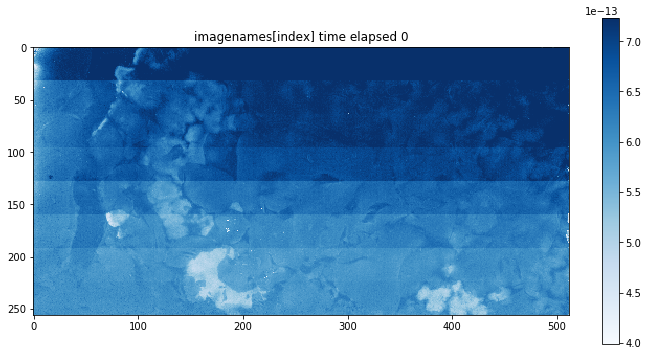

Average of raw pixel values:  6.583548430161645e-13


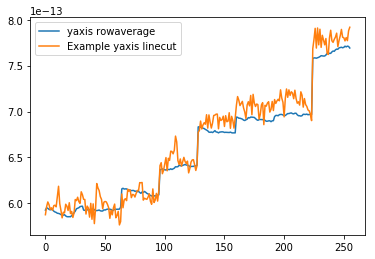

In [29]:
plot_single((image_2d_ph1),data_name='imagenames[index]',tx=0,t0=0);

linecut = image_2d_ph1[256,:]
rowaverage=np.mean(image_2d_ph1,axis=0)
plt.plot(rowaverage, label="yaxis rowaverage")
plt.plot(linecut, label="Example yaxis linecut")
plt.legend()
frameaverage = np.mean(image_2d_ph1)
print("Average of raw pixel values: ",frameaverage)

# plot_single((image_2d_ph2),data_name='imagenames[index]',tx=0,t0=0);

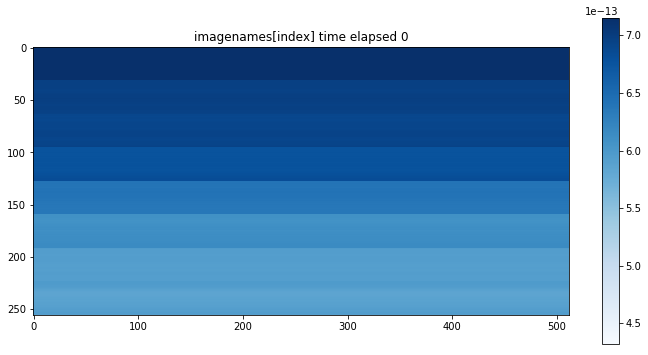

In [30]:
banded = np.ones_like(image_2d_ph1)
axislen = len(banded[:,0])
for i in range(axislen):
    banded[i,:]=rowaverage
plot_single((banded),data_name='imagenames[index]',tx=0,t0=0);

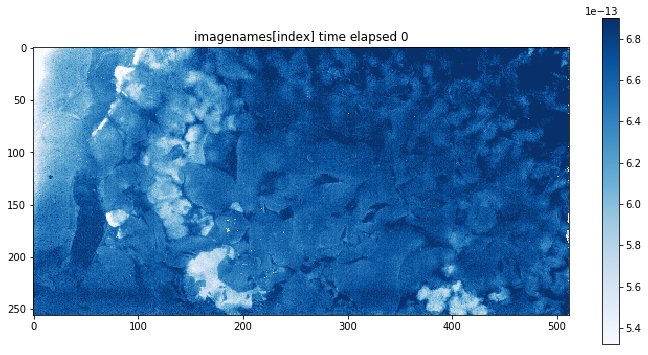

Average of new pixel values:  6.583548430161645e-13


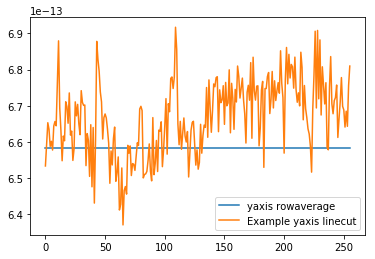

In [31]:
debanded=rm_banding(image_2d_ph1)
plot_single(debanded,data_name='imagenames[index]',tx=0,t0=0);

linecut = debanded[256,:]
rowaverage=np.mean(debanded,axis=0)
plt.plot(rowaverage, label="yaxis rowaverage")
plt.plot(linecut, label="Example yaxis linecut")
plt.legend()
print("Average of new pixel values: ",np.mean(image_2d_ph1))

# plot_single((image_2d_ph2),data_name='imagenames[index]',tx=0,t0=0);

(vmin,vmax)= (2.946221234396082e-13, 7.503271761141955e-13)


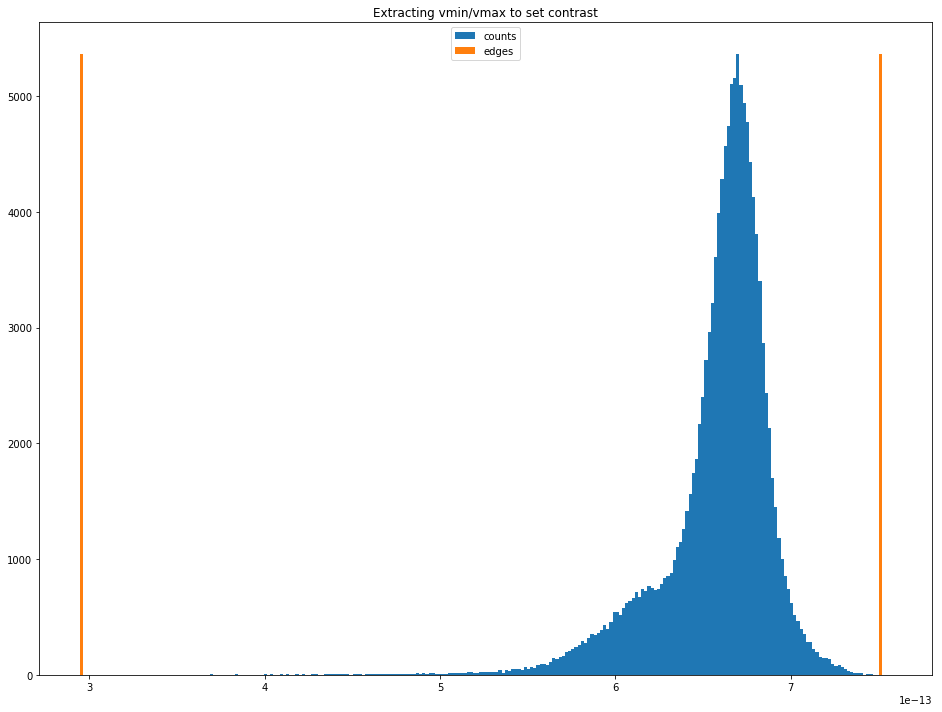

In [19]:
counts,bins=np.histogram(debanded,bins=256);
plt.figure(figsize=(16,12));
plt.title('Extracting vmin/vmax to set contrast');
plt.hist(bins[:-1], bins, weights=counts,label='counts');
places = np.where(counts>1);
vmin_i,vmax_i= np.min(places),np.max(places);
plt.hist( [bins[:-1][vmin_i],bins[:-1][vmax_i]], bins, weights=[np.max(counts),np.max(counts)],label='edges');
plt.legend();
(vmin,vmax) = (bins[:-1][vmin_i],bins[:-1][vmax_i])
print('(vmin,vmax)=',(vmin,vmax));

In [13]:
debanded=rm_banding(image_2d_ph1)
plot_single(debanded,vmin=vmin,vmax=vmax);

linecut = debanded[256,:]
rowaverage=np.mean(debanded,axis=0)
plt.plot(rowaverage, label="yaxis rowaverage")
plt.plot(linecut, label="Example yaxis linecut")
plt.legend()
print("Average of raw pixel values: ",np.mean(image_2d_ph1))

# plot_single((image_2d_ph2),data_name='imagenames[index]',tx=0,t0=0);

NameError: name 'vmin' is not defined